###  Bank Marketing (Campaign) -- Group Project

**Problem Statement:**

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

**Why ML Model:** 

Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will be difficult for business to campaign based on duration.

**Task:**

Business Understanding

Data understanding

Exploratory data Analysis

Data Preparation

Model Building ( Logistic Regression, ensemble, Boosting etc)

Model Selection

Performance reporting

Converting ML metrics into Business metric and explaining result to business

Prepare presentation for non technical persons.

**Data Set Information :**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Attribute Information:

# Input variables:
**bank client data:**
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):**
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
#Let's import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\İntership Projects\Seventh week\bank.csv", sep=';')

In [3]:
#Let's drop duration columns because we will not need it as it mentioned in information of dataset
df.drop('duration',axis=1,inplace = True)

## Explorotory Data Analysis (EDA)

In [68]:
#First 5 rows of dataset
df.head()

,age,balance,housing,loan,campaign,pdays,previous,poutcome,y,job_admin.,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,30,1787,0,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,4789,1,1,1,339,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,1350,1,0,1,330,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,1,1,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,0,1,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Last 5 rows of dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,2,249,7,other,no


In [83]:
#Shape of dataset
df.shape

(4521, 16)

In [63]:
#Columns of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [64]:
#Some statistics values of dataset
df.describe()

,age,balance,day,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,50.000000,871.000000,25.000000


In [65]:
#Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.2+ KB


In [84]:
#Check duplicates values
df.duplicated().sum()

0

In [85]:
#Check missing and null values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [86]:
#Types of columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
# Let's find that which columns are numerical in dataset
numeric_columns = df.select_dtypes(include=['int','float']).columns
numeric_columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

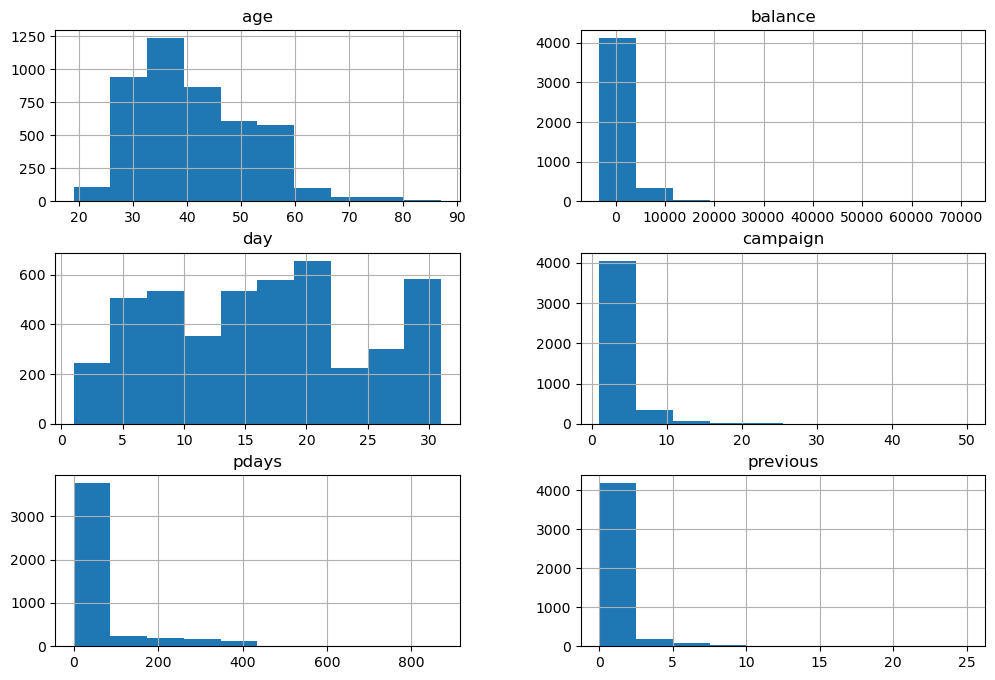

In [5]:
#Let's visualize numerical variable in the dataset to understand it 

df.hist(column = numeric_columns,figsize=(12,8))
plt.show()

In [6]:
# Let's find that which columns are categorical in dataset
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

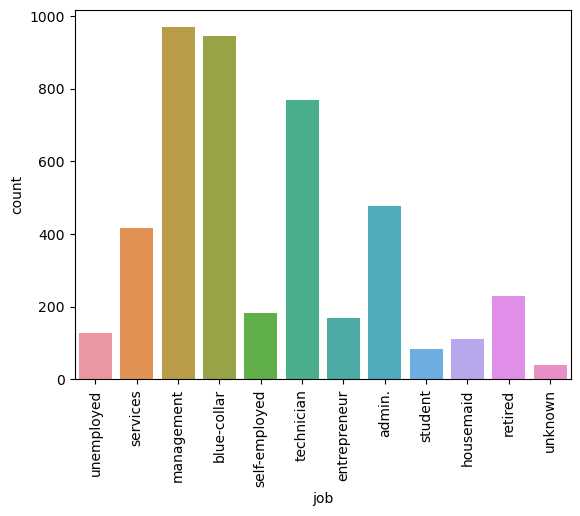

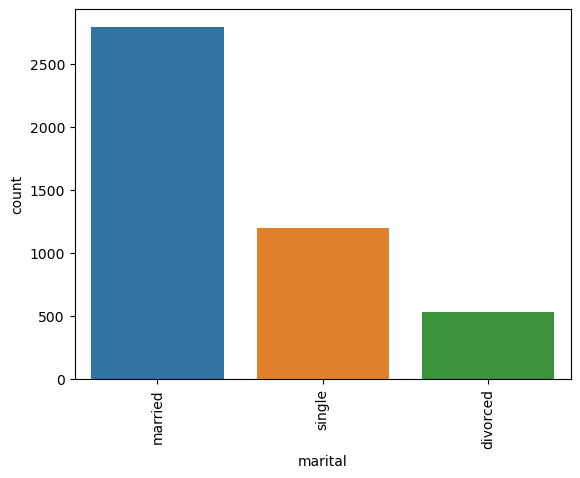

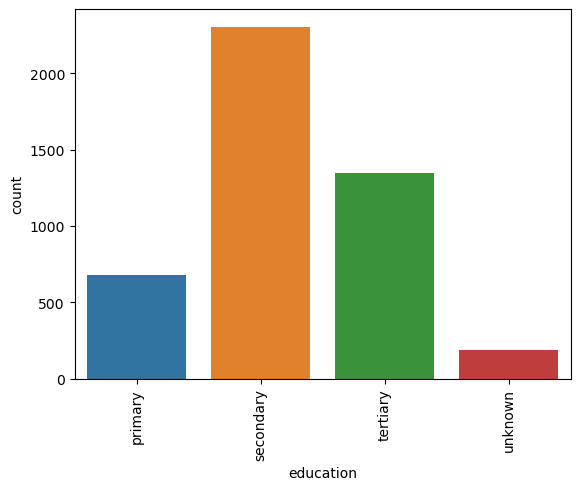

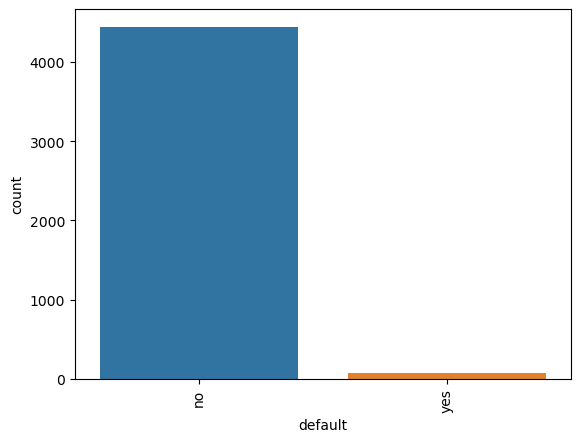

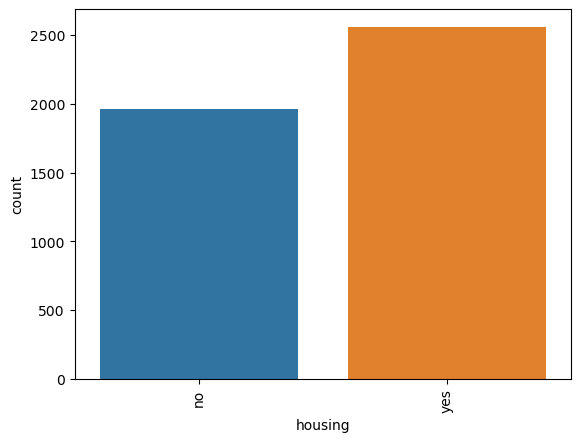

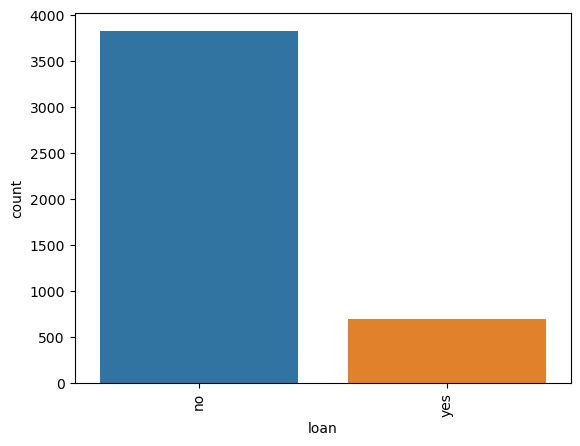

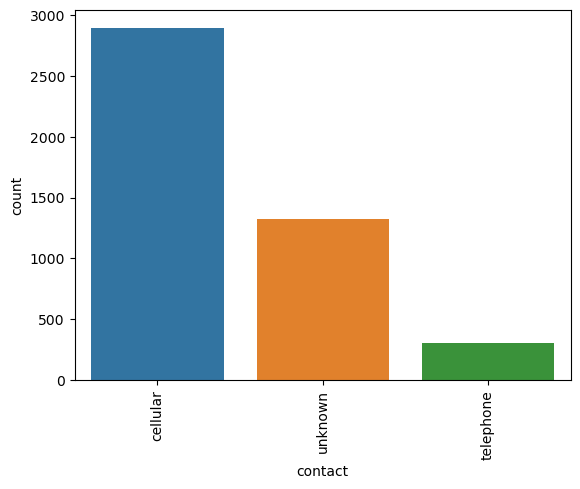

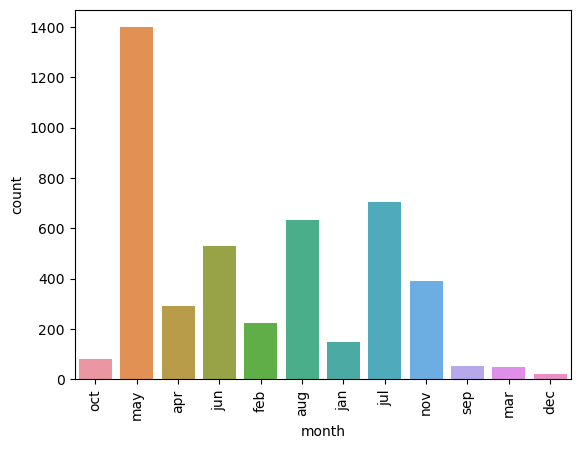

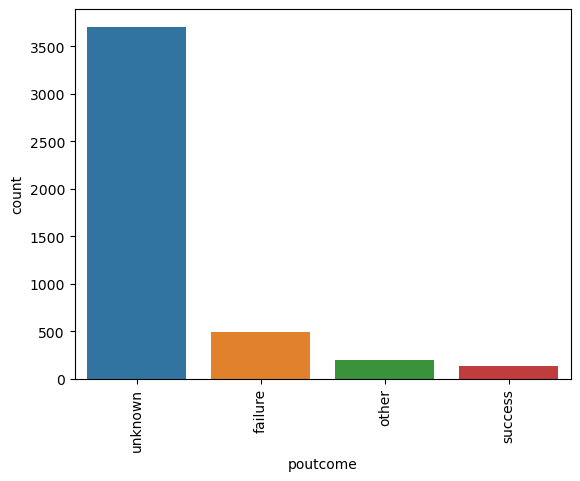

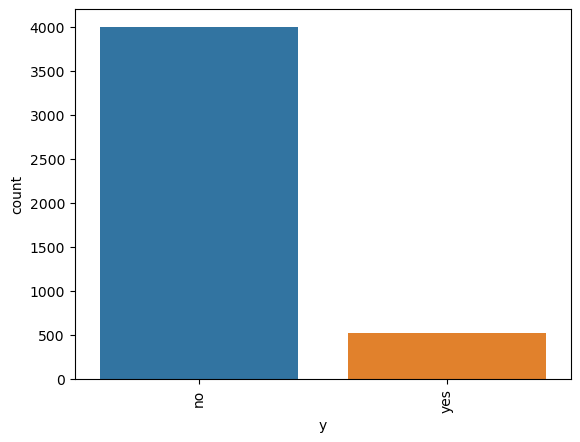

In [90]:
#Let's visualize categorical variables
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=90)
    plt.show()

## Categorical Variables

There are 2 ranges of variables in ML.

1.Nominal variables which order is not important such as colors.

2.Ordinal variables which order is important such as Bachelor's Degree, Master's Degree, Doctorate Degree.

**Ordinal variables**

**poutcome**

In [91]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

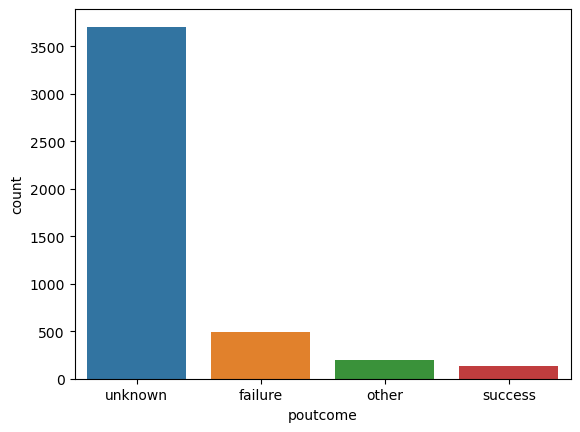

In [69]:
#let's visaulize it
sns.countplot(data=df,x=df.poutcome)
plt.show()

In [7]:
df['poutcome']=df['poutcome'].map({'success' :1,'failure': -1, 'other' :0,'unknown' :0})

In [93]:
df['poutcome'].value_counts()

 0    3902
-1     490
 1     129
Name: poutcome, dtype: int64

**default**

In [94]:
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

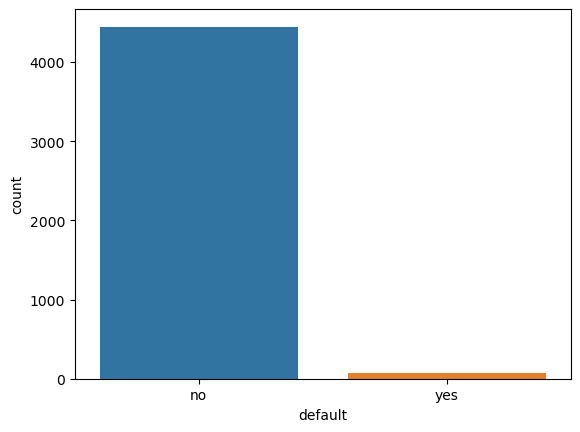

In [95]:
#let's visualize it
sns.countplot(x=df.default,data=df)
plt.show()

In [8]:
#Let's drop default columns because it is not more important

df.drop(['default'],axis=1,inplace=True)

**housing**

In [97]:
df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

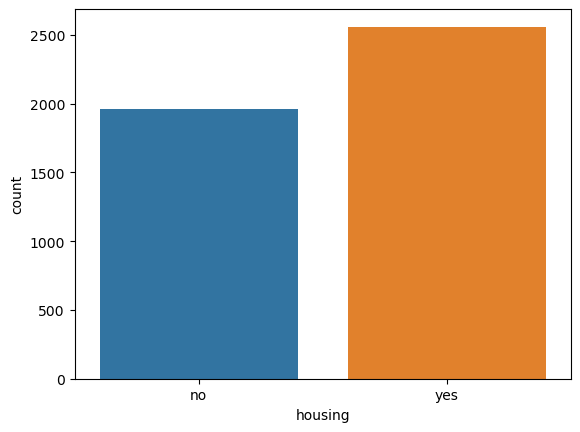

In [98]:
#let's visualize it
sns.countplot(x=df.housing,data=df)
plt.show()

In [9]:
df['housing']=df['housing'].map({'yes' : 1, 'no' :0})

In [100]:
df['housing'].value_counts()

1    2559
0    1962
Name: housing, dtype: int64

**loan**

In [101]:
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

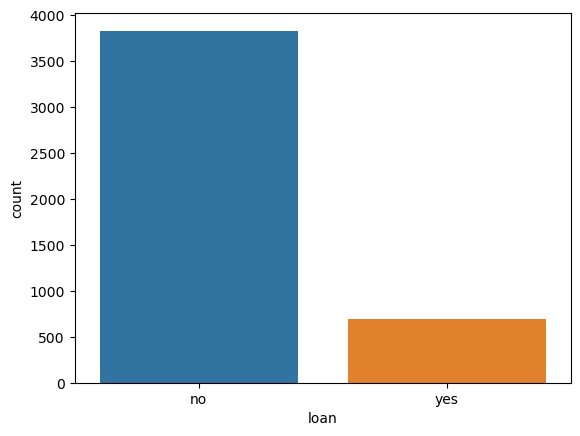

In [102]:
#let's visualize it
sns.countplot(x=df.loan,data=df)
plt.show()

In [10]:
df['loan']=df['loan'].map({'yes' :1, 'no' : 0})

In [88]:
df['loan'].value_counts()

0    3830
1     691
Name: loan, dtype: int64

## Nominal Variables

In [11]:
nominal_variables=['job','marital','education','contact','month','day']

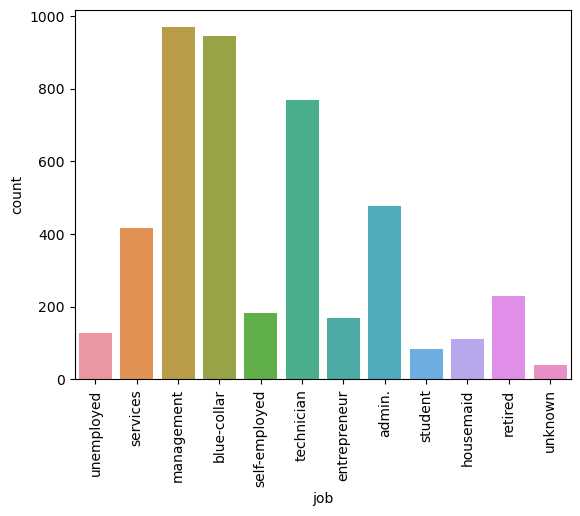

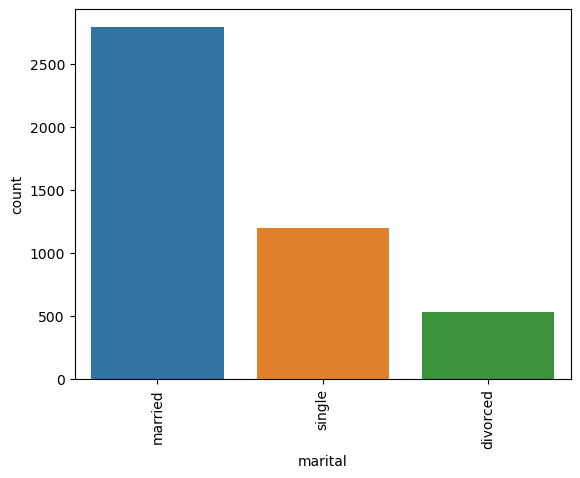

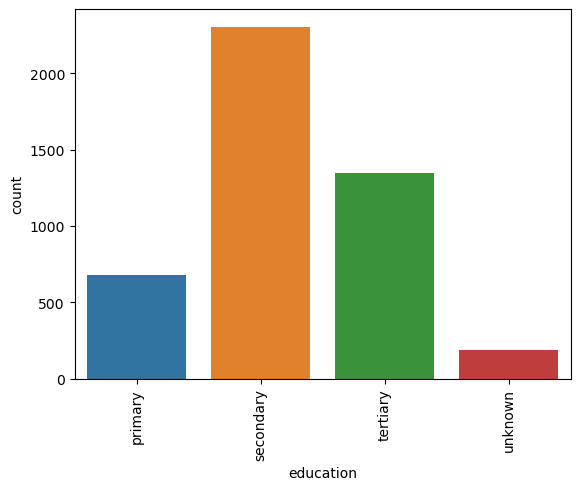

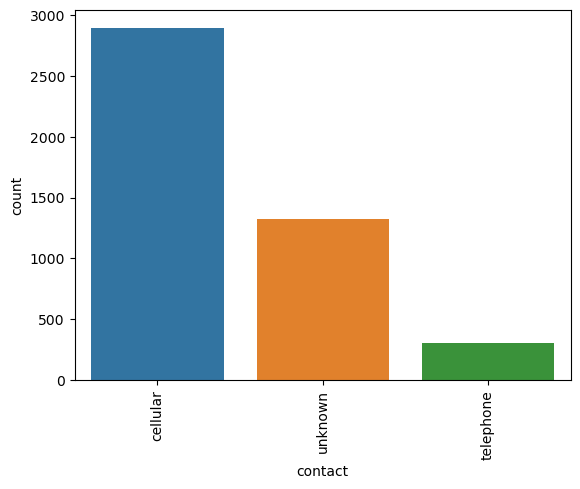

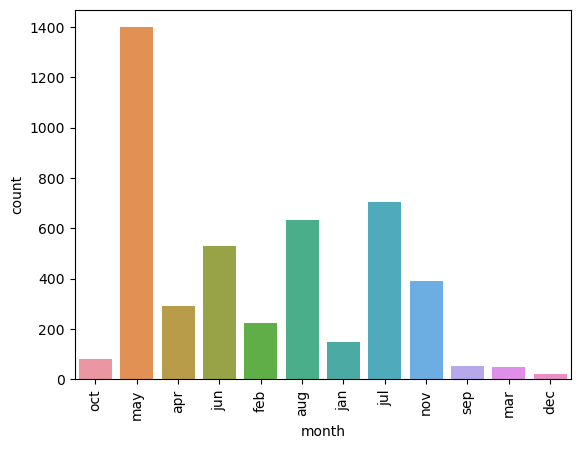

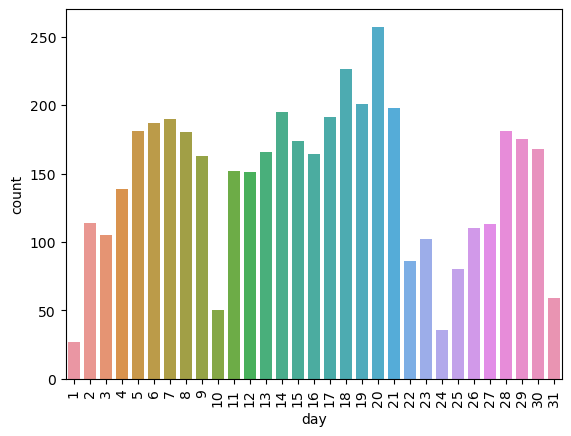

In [15]:
#Let's visualize nominal variables
for column in nominal_variables:
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=90)
    plt.show()

## Target Variable

In [106]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

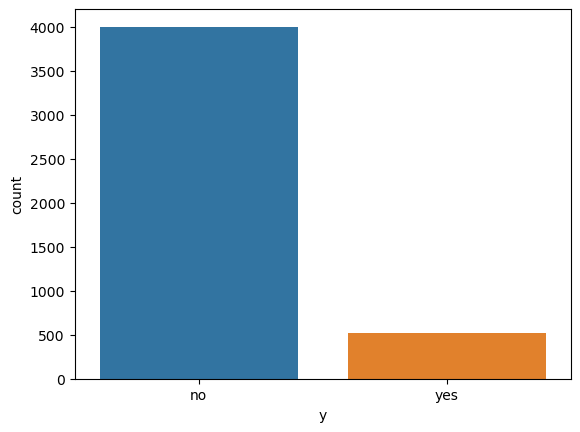

In [107]:
#let's visualize it
sns.countplot(x=df.y,data=df)
plt.show()

In [12]:
df['y']=df['y'].map({'yes' :1,'no' :0})

In [109]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

## One Hot Encoding

In [13]:
df=pd.get_dummies(df,columns=nominal_variables)

In [16]:
df.head()

,age,balance,housing,loan,campaign,pdays,previous,poutcome,y,job_admin.,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,30,1787,0,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,4789,1,1,1,339,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,1350,1,0,1,330,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,1,1,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,0,1,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df.shape

(4521, 74)

In [113]:
df.columns

Index(['age', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26'

## Let's split the data into Features Variables(X) and Target Variable(y)

In [14]:
X=df.drop('y',axis=1)


y=df['y']

In [19]:
X.shape

(4521, 73)

In [116]:
y.shape

(4521,)

## Train Test Split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.8,random_state=42)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3616, 73)
(3616,)
(905, 73)
(905,)


## Scale the features

In [17]:
#Let's create Standart Scaler

scale=StandardScaler()

In [23]:
#It is required to scale columns because there are differences the value of columns
X_train.head(10)

,age,balance,housing,loan,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
978,34,262,0,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,32,2349,0,0,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3139,34,1076,0,0,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1822,31,156,0,0,7,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4445,46,258,1,0,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3159,35,725,1,0,7,133,1,-1,1,0,...,0,0,0,0,0,0,0,0,0,0
4299,37,0,1,1,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2063,39,694,1,0,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3815,31,623,1,0,2,349,5,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2185,40,1438,1,0,1,351,2,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#It is required to scale columns because there are differences the value of columns
X_test.head(10)

,age,balance,housing,loan,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
2398,51,-2082,0,1,6,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
800,50,2881,0,0,2,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2288,50,1412,0,0,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2344,37,0,1,0,13,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3615,31,757,0,0,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3548,39,-650,0,0,2,364,1,-1,1,0,...,0,0,0,0,0,0,0,0,0,0
1115,41,5110,1,0,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4053,31,360,0,0,1,297,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
838,31,454,0,0,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4141,37,0,0,0,4,107,2,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
columns=X_train.columns

In [19]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [27]:
#the type of data changes ater scaling
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
#Let's convert numpy array to pandas dataframe
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [29]:
X_train.head(10)

,age,balance,housing,loan,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,-0.678371,-0.413804,-1.127545,-0.425356,-0.567241,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
1,-0.866030,0.334571,-1.127545,-0.425356,0.671186,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
2,-0.678371,-0.121913,-1.127545,-0.425356,-0.257635,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
3,-0.959860,-0.451815,-1.127545,-0.425356,1.290399,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
4,0.447585,-0.415238,0.886883,-0.425356,-0.567241,-0.408832,-0.314583,0.215854,-0.333026,1.943386,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,6.154813,-0.200689,-0.199942,-0.203653,-0.114756
5,-0.584541,-0.247778,0.886883,-0.425356,1.290399,0.954711,0.264019,-2.551977,3.002769,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
6,-0.396882,-0.507754,0.886883,2.350973,-0.257635,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,8.714136
7,-0.209223,-0.258894,0.886883,-0.425356,-0.567241,-0.408832,-0.314583,0.215854,-0.333026,1.943386,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
8,-0.959860,-0.284354,0.886883,-0.425356,-0.257635,3.152661,2.578429,-2.551977,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
9,-0.115393,0.007896,0.886883,-0.425356,-0.567241,3.173012,0.842622,-2.551977,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756


In [30]:
X_test.head(10)

,age,balance,housing,loan,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.916734,-1.254336,-1.127545,2.350973,0.980793,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,4.982828,-0.199942,-0.203653,-0.114756
1,0.822904,0.525340,-1.127545,-0.425356,-0.257635,-0.378304,2.578429,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
2,0.822904,-0.001427,-1.127545,-0.425356,0.051972,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
3,-0.396882,-0.507754,0.886883,-0.425356,3.148040,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
4,-0.959860,-0.236303,-1.127545,-0.425356,-0.257635,-0.408832,-0.314583,0.215854,3.002769,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
5,-0.209223,-0.740837,-1.127545,-0.425356,-0.257635,3.305296,0.264019,-2.551977,3.002769,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
6,-0.021563,1.324634,0.886883,-0.425356,-0.567241,-0.408832,-0.314583,0.215854,3.002769,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
7,-0.959860,-0.378662,-1.127545,-0.425356,-0.567241,2.623525,0.842622,0.215854,3.002769,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
8,-0.959860,-0.344955,-1.127545,-0.425356,0.051972,-0.408832,-0.314583,0.215854,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756
9,-0.396882,-0.507754,-1.127545,-0.425356,0.361579,0.690143,0.842622,-2.551977,-0.333026,-0.514566,...,-0.135295,-0.147504,-0.09299,-0.134231,-0.160672,-0.162474,-0.200689,-0.199942,-0.203653,-0.114756


## Model Selection

**1.Logistic Regression Model Score with Hyperparameter Tuning**

In [27]:
logreg=LogisticRegression()

In [28]:
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [29]:
grid_search = GridSearchCV(logreg, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [30]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [31]:
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8899348937438389


In [32]:
logreg_best = LogisticRegression(**best_params)
logreg_best.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [33]:
test_score = logreg_best.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.8939226519337017


**2.Support Vector Machines Model Score with Hyperparameter Tuning**

In [34]:
svc=SVC()

In [35]:
hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [36]:
grid_search = GridSearchCV(svc, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [37]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [40]:
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8838487578612748


In [38]:
svc_best = SVC(**best_params)
svc_best.fit(X_train, y_train)

SVC(C=1)

In [39]:
test_score = svc_best.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.887292817679558


**3.Decision Tree Model Score with Hyperparameter Tuning**

In [41]:
dt=DecisionTreeClassifier()

In [42]:
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
grid_search = GridSearchCV(dt, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [45]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [46]:
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.884678633379947


In [47]:
dt_best = DecisionTreeClassifier(**best_params)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10)

In [48]:
test_score = dt_best.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.8961325966850828


**4.Random Forest Model Score with Hyperparameter Tuning**

In [21]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [51]:
grid_search = GridSearchCV(rf, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [52]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [53]:
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8910387198826253


In [54]:
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300)

In [55]:
test_score = rf_best.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.8983425414364641


In [22]:
y_pred=rf.predict(X_test)

## Model Building

Based on the above results, we found that Random Forest Classifier works best so it picks the same for model building...

In [23]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features='sqrt')

In [24]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300)

In [25]:
rf.score(X_test,y_test)

0.8994475138121547

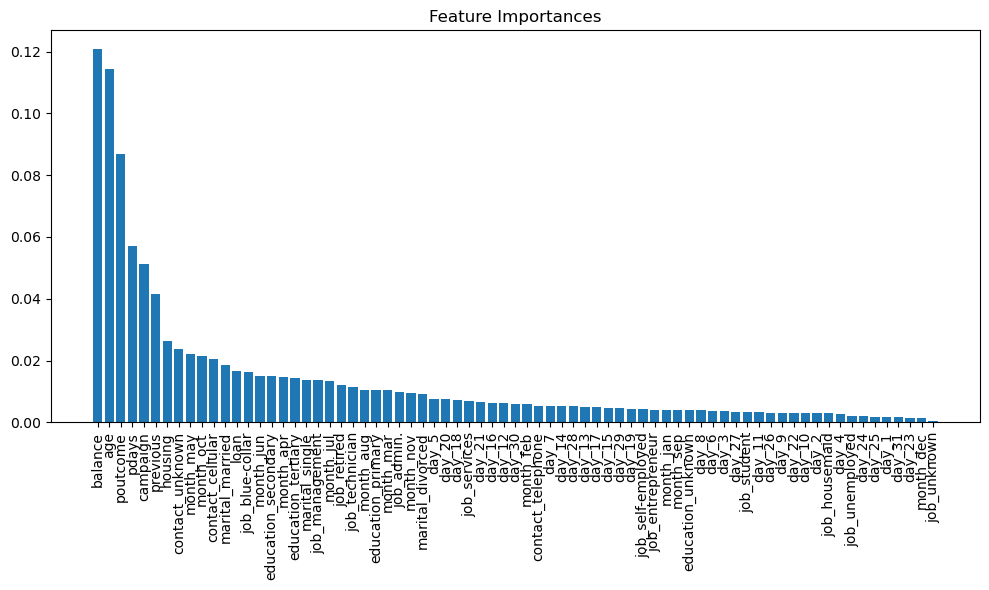

In [26]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()

## Performance Reporting

In [27]:
#Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[798,   9],
       [ 88,  10]], dtype=int64)

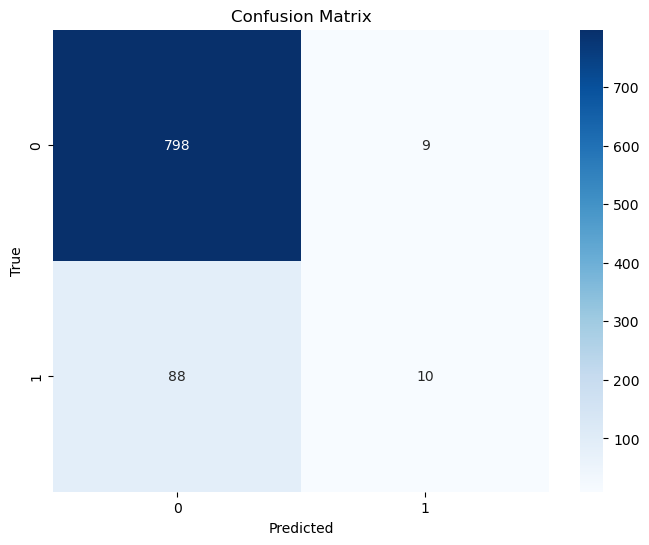

In [28]:
#let's visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#Classification_report
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       807
           1       0.53      0.10      0.17        98

    accuracy                           0.89       905
   macro avg       0.71      0.55      0.56       905
weighted avg       0.86      0.89      0.86       905



## The classification report provides a detailed summary of the performance of a classification model for each class. Let's interpret each metric:

1. Precision:
   - For class 0: The precision for class 0 is 0.90, indicating that out of all instances predicted as class 0, 90% were actually true positives.
   - For class 1: The precision for class 1 is 0.53, suggesting that out of all instances predicted as class 1, only 53% were actually true positives.

2. Recall:
   - For class 0: The recall for class 0 is 0.99, indicating that the model correctly identified 99% of the actual instances belonging to class 0.
   - For class 1: The recall for class 1 is 0.10, suggesting that the model captured only 10% of the actual instances belonging to class 1.

3. F1-score:
   - For class 0: The F1-score for class 0 is 0.94, which is a weighted average of precision and recall. It provides a balanced measure of the model's performance for class 0.
   - For class 1: The F1-score for class 1 is 0.17, indicating a relatively low performance in terms of balancing precision and recall for class 1.



5. Accuracy:
   - The overall accuracy of the model is 0.89, suggesting that it correctly classified 89% of the instances in the dataset.

**ROC AUC Score for Random Forest Model with hyperparameter tuning**

When dealing with imbalanced datasets, ROC AUC (Receiver Operating Characteristic Area Under the Curve) can be a more appropriate metric to evaluate the performance of your model compared to metrics like Precission,Recall,F1-score and Accuracy.

In [47]:
#We clearly see that our dataset is imbalanced this is why we did not get a good score for F1 Score
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

grid_search_ROC_AUC = GridSearchCV(rf, hyperparameters, scoring='roc_auc', cv=5)

In [39]:
grid_search_ROC_AUC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='sqrt',
                                              min_samples_leaf=4,
                                              min_samples_split=10,
                                              n_estimators=300),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [41]:
rf_best_model = grid_search_ROC_AUC.best_estimator_
rf_best_score = grid_search_ROC_AUC.best_score_

In [42]:
y_pred = rf_best_model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred)

In [43]:
print('ROC AUC score of RF Model :' ,roc_auc)

ROC AUC score of RF Model : 0.7429633563462559


**ROC AUC CURVE**

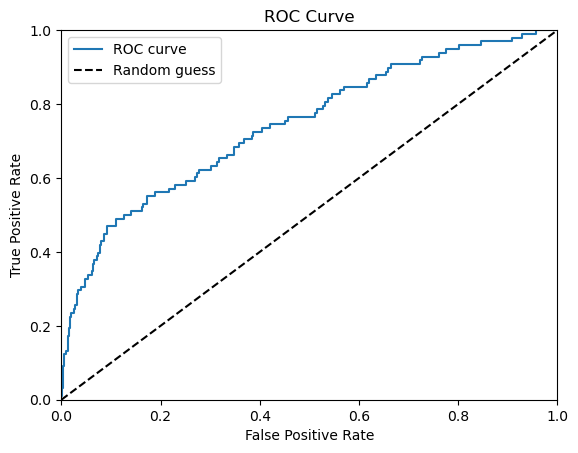

In [45]:
# lET'S CHECK ROC-AUC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="upper left")
plt.show()

## Converting ML metrics into Business metric and explaining result to business

1. Accuracy:
   - ML Metric: The model has an accuracy of 89%, meaning it correctly classified 89% of the instances.
   - Business Metric: The accuracy can be translated into the percentage of correct predictions made by the model in real-world business scenarios.

   Explanation to Business: The model has shown a relatively high accuracy of 89%, indicating that it can be reliable in making correct predictions in most cases. This means that the model is likely to provide accurate insights or decisions, which can be valuable for business operations and decision-making.

2. Precision and Recall:
   - ML Metrics: For class 0, the model has a precision of 90% and a recall of 99%. For class 1, the model has a precision of 53% and a recall of 10%.
   - Business Metrics: Precision can represent the percentage of accurately predicted positive instances, while recall can represent the percentage of actual positive instances captured by the model.

   Explanation to Business: The model demonstrates high precision for class 0, suggesting that when it predicts an instance as belonging to class 0, it is likely to be correct 90% of the time. However, the low precision and recall for class 1 indicate that the model struggles to accurately predict instances of this class, capturing only 63% of the actual positives and misclassifying 37% of positive instances. This implies that the model may have limitations when identifying instances related to class 1, potentially leading to missed opportunities or misinterpretation of important cases.

3. F1-Score:
   - ML Metric: The F1-score for class 0 is 0.94, and for class 1, it is 0.17.
   - Business Metric: The F1-score represents the overall balance between precision and recall, considering both false positives and false negatives.

   Explanation to Business: The F1-score for class 0 is high at 0.94, indicating a good balance between precision and recall. However, the F1-score for class 1 is low at 0.17, implying that the model struggles to find the right balance between correctly identifying positive instances and avoiding false positives or negatives. This could potentially lead to inefficiencies or missed opportunities when dealing with instances of class 1.

4. ROC AUC Score:
   - ML Metric: The ROC AUC score represents the model's ability to differentiate between positive and negative instances, with a score of 0.7429633563462559.
   - Business Metric: The ROC AUC score indicates the model's capability to accurately rank instances and make informed predictions.

   Explanation to Business:The ROC AUC score of 0.7429633563462559 signifies that your Random Forest model performs reasonably well in distinguishing between positive and negative instances. This score is derived from evaluating the model's ability to rank instances based on their predicted probabilities. A higher ROC AUC score indicates better performance.
